In [1]:
import numpy as np 

In [8]:
x = np.arange(10**7)/10**6
x

array([0.000000e+00, 1.000000e-06, 2.000000e-06, ..., 9.999997e+00,
       9.999998e+00, 9.999999e+00])

In [11]:
%%timeit 
np.sum(x)

6.3 ms ± 910 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit 
sum(x)

2.09 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
matrix = [[1,2,3],[4,8,6],[7,8,9]]
type(matrix)

list

In [29]:
matrix = np.array(matrix)
matrix

array([[1, 2, 3],
       [4, 8, 6],
       [7, 8, 9]])

In [30]:
type(matrix)

numpy.ndarray

In [31]:
matrix.shape

(3, 3)

In [32]:
matrix.ndim

2

In [33]:
A = np.zeros((2,2,2,2,2))
A.ndim

5

In [34]:
np.linalg.det(matrix)

-36.0

In [35]:
np.linalg.inv(matrix)

array([[-0.66666667, -0.16666667,  0.33333333],
       [-0.16666667,  0.33333333, -0.16666667],
       [ 0.66666667, -0.16666667,  0.        ]])

In [45]:
a = [1,2,3]
b = [4,5,6]
a + b

[1, 2, 3, 4, 5, 6]

In [47]:
3*a

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [48]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a + b

array([5, 7, 9])

In [49]:
3*a

array([3, 6, 9])

__Задача:__ элемент их $X$, который ближе всего к элементу $v$ по абсолютной величине

In [40]:
X = np.random.binomial(100, 0.5, size=(5,5))
X

array([[49, 54, 51, 52, 49],
       [50, 52, 59, 49, 48],
       [59, 43, 53, 55, 53],
       [48, 56, 51, 45, 52],
       [42, 47, 54, 51, 41]])

In [66]:
def nearest_value(X, v):
    R = np.abs(X - v)
    return X[np.where(R == np.min(R))]

vvv = 50.5
XXX = np.random.binomial(100, 0.5, size=(5,5))
nearest_value(XXX, vvv)

array([50, 50, 51, 50])

__Задача (ЗБЧ):__ 

- кость игральная $<3$, мы получаем 1 2 3 рубля от другого человека
- выпало $>3$, мы платим 1 2 3 рубля другому человеку 

Хотим ли мы играть в эту игру? 

$$
E(X) = \frac{1}{6} \cdot 1 +  \frac{1}{6} \cdot 2 + \ldots +  \frac{1}{6} \cdot 5 +  \frac{1}{6} \cdot 6 = 3.5
$$

$$
\bar{x} \to E(X)
$$

__В какую игру играть невыгодно?__ 

- если среднее меньше 3 => платят нам 
- если среднее больше 3 => платим мы 

In [67]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [70]:
np.random.choice(np.arange(1,7))

2

In [74]:
n_obs = 1000
x = np.random.choice(np.arange(1,7), size=n_obs)
x[:10]

array([5, 2, 1, 3, 6, 6, 6, 2, 1, 5])

In [76]:
np.cumsum(x)[:5]

array([ 5,  7,  8, 11, 17])

In [79]:
y = np.cumsum(x)/np.arange(1, n_obs + 1)
y[:5]

array([5.        , 3.5       , 2.66666667, 2.75      , 3.4       ])

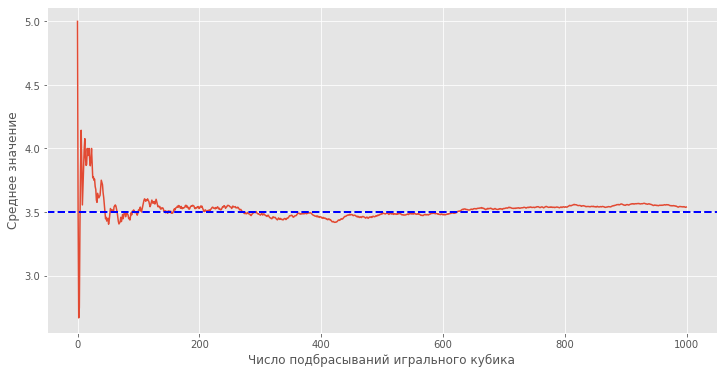

In [88]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(12,6))
plt.plot(y)
plt.axhline(3.5, color='blue', lw=2, linestyle='dashed')
plt.xlabel('Число подбрасываний игрального кубика')
plt.ylabel('Среднее значение');

### Джойны

In [91]:
import pandas as pd
X = np.random.binomial(100, 0.5, size=(5,5))
X

array([[55, 48, 44, 55, 62],
       [58, 42, 46, 50, 39],
       [46, 49, 54, 51, 59],
       [48, 49, 56, 58, 53],
       [47, 57, 46, 53, 55]])

In [94]:
df = pd.DataFrame(X)
df.columns = ['a','b','c','d','e']
df.index = ['z','y','x','w','v']
df

,a,b,c,d,e
z,55,48,44,55,62
y,58,42,46,50,39
x,46,49,54,51,59
w,48,49,56,58,53
v,47,57,46,53,55


In [96]:
df.values

array([[55, 48, 44, 55, 62],
       [58, 42, 46, 50, 39],
       [46, 49, 54, 51, 59],
       [48, 49, 56, 58, 53],
       [47, 57, 46, 53, 55]])

In [98]:
df.columns.values

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [100]:
df.index.values

array(['z', 'y', 'x', 'w', 'v'], dtype=object)

In [103]:
df.loc['w','c']

56

In [107]:
dff = df.reset_index(drop=True)
dff

,a,b,c,d,e
0,55,48,44,55,62
1,58,42,46,50,39
2,46,49,54,51,59
3,48,49,56,58,53
4,47,57,46,53,55


In [109]:
dff = dff.set_index('a')
dff

,b,c,d,e
a,,,,
55,48,44,55,62
58,42,46,50,39
46,49,54,51,59
48,49,56,58,53
47,57,46,53,55


In [110]:
dff.loc[48,'c']

56

In [114]:
dg = pd.DataFrame({'f':[3,4,5], 'g':[6,7,8]})
dg.index = ['z', 'y','q']
dg

,f,g
z,3,6
y,4,7
q,5,8


In [111]:
df

,a,b,c,d,e
z,55,48,44,55,62
y,58,42,46,50,39
x,46,49,54,51,59
w,48,49,56,58,53
v,47,57,46,53,55


![](https://3.bp.blogspot.com/-DtX9zbMKVqs/Vrj4p9JZT1I/AAAAAAAAAMU/g8bJdZKSvjY/s1600/Joins.png)

In [115]:
df.join(dg) # left join

,a,b,c,d,e,f,g
z,55,48,44,55,62,3.0,6.0
y,58,42,46,50,39,4.0,7.0
x,46,49,54,51,59,NaN,NaN
w,48,49,56,58,53,NaN,NaN
v,47,57,46,53,55,NaN,NaN


In [117]:
df.join(dg, how='right') # right join

,a,b,c,d,e,f,g
z,55.0,48.0,44.0,55.0,62.0,3,6
y,58.0,42.0,46.0,50.0,39.0,4,7
q,NaN,NaN,NaN,NaN,NaN,5,8


In [118]:
df.join(dg, how='inner')

,a,b,c,d,e,f,g
z,55,48,44,55,62,3,6
y,58,42,46,50,39,4,7


In [119]:
df.join(dg, how='outer')

,a,b,c,d,e,f,g
q,NaN,NaN,NaN,NaN,NaN,5.0,8.0
v,47.0,57.0,46.0,53.0,55.0,NaN,NaN
w,48.0,49.0,56.0,58.0,53.0,NaN,NaN
x,46.0,49.0,54.0,51.0,59.0,NaN,NaN
y,58.0,42.0,46.0,50.0,39.0,4.0,7.0
z,55.0,48.0,44.0,55.0,62.0,3.0,6.0


Про разные джойны, конкаты, мерджи: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

__Задача:__ 

- на вход матрица
- найти среднее по каждому столбцу 
- x - xs
- найти стандартное отклонение по каждому столбцу 
- (x - xs)/std

In [120]:
X = np.random.binomial(100, 0.5, size=(5,5))
X

array([[39, 56, 51, 37, 60],
       [56, 47, 41, 53, 47],
       [52, 45, 55, 47, 53],
       [50, 47, 53, 44, 57],
       [45, 52, 54, 52, 54]])

In [122]:
X.mean(axis=0)

array([48.4, 49.4, 50.8, 46.6, 54.2])

In [125]:
X[:,0] # все строки нулевого столбца

array([39, 56, 52, 50, 45])

In [126]:
X[:,0].mean()

48.4

In [138]:
X = X - X.mean(axis=0)
X

array([[-9.4,  6.6,  0.2, -9.6,  5.8],
       [ 7.6, -2.4, -9.8,  6.4, -7.2],
       [ 3.6, -4.4,  4.2,  0.4, -1.2],
       [ 1.6, -2.4,  2.2, -2.6,  2.8],
       [-3.4,  2.6,  3.2,  5.4, -0.2]])

In [139]:
X.mean(axis=0)

array([-8.88178420e-17, -1.77635684e-16, -1.77635684e-16,  0.00000000e+00,
       -1.11022302e-17])

In [152]:
X = (X - X.mean(axis=0))/X.std(axis=0)
X

array([[-1.59712502,  1.6377625 ,  0.03940552, -1.65027399,  1.33201412],
       [ 1.29129257, -0.59555   , -1.9308705 ,  1.10018266, -1.65353476],
       [ 0.6116649 , -1.09184167,  0.82751593,  0.06876142, -0.27558913],
       [ 0.27185107, -0.59555   ,  0.43346072, -0.44694921,  0.6430413 ],
       [-0.57768352,  0.64517917,  0.63048832,  0.92827912, -0.04593152]])

$x \in [1; 5]$

$y \in [0; 1]$

$$
y = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

In [153]:
X = np.random.binomial(100, 0.5, size=(5,5))
X

array([[46, 39, 50, 44, 48],
       [49, 43, 52, 50, 48],
       [56, 40, 49, 45, 49],
       [48, 39, 44, 58, 48],
       [54, 43, 53, 51, 52]])

In [156]:
(X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))

array([[0.        , 0.        , 0.66666667, 0.        , 0.        ],
       [0.3       , 1.        , 0.88888889, 0.42857143, 0.        ],
       [1.        , 0.25      , 0.55555556, 0.07142857, 0.25      ],
       [0.2       , 0.        , 0.        , 1.        , 0.        ],
       [0.8       , 1.        , 1.        , 0.5       , 1.        ]])

__Важная тонкость:__

In [141]:
0.4 - 0.3 == 0.1

False

In [142]:
0.4 - 0.3

0.10000000000000003

In [149]:
np.abs(0.4 - 0.3) < 0.1 + 1e-10

True

In [144]:
0.4 - 0.2 == 0.2

True